# 2.
1. Fraud Detection in Banking: A model that classifies transactions as either fraudulent or authentic. Accuracy is useful because it is important to stop fraudulent transactions (True Positive) and allow authentic transactions (True Negative). Also failing to act on fraudulent transactions (False Negative) and acting on authentic transactions (False Positive) causes inconvenience and damages trust. Hence all 4 categories are important.
2. Early Warning Systems: A model that predicts whether a natural disaster is about to happen. Sensitivity is useful because it is very important that a natural disaster is predicted when it is about to occur (True Positive) to prevent severe casualties even if false alarms occur (False Positive). Whereas if nothing is predicted but a natural disaster does occur (False Negative) can be detrimental. Hence having True Positive and avoiding False Negative is very important whereas Ture Negative and False Positive is less significant.
3. Quality Control: A model that determines whether a product is defective. Specificity is useful because we want to always filter out the defective ones (True Negative) even if good products were mistakenly disgarded (False Negative). Whereas if we fail to detect defective product (False Positive) and it reaches the market can cause severe harm to the company. Hence having True Negative and avoiding False Positive is very important whereas False Negative and True Positive is less significant.
4. Spam Email Filting: A model that classifies emails as either spam or not spam. Precision is useful because we want to identify all spam emails (True Positive) and filter them out, and identify all legit emails (True Negative) and sent it to the inbox. If we fail to detect a spam (False Negative) and it reaches the user's inbox, the user will most likely just disregard the email, but if legit emails were detected as spam (False Positive), it can cause severe inconvenience for the user. Hence having True Positive and avoiding False Positive is very important, whereas True Negative and False Negative are less significant.

### ChatBot Summary
Summary of Interactions
We discussed the applications and importance of different performance metrics in machine learning:

Accuracy: Useful when class distributions are balanced, such as in medical diagnosis for common illnesses or quality control in manufacturing.

Sensitivity (Recall): Crucial for catching all positives in high-stakes scenarios like cancer screening, fraud detection, and disaster prediction.

Specificity: Important for avoiding false positives in contexts like routine medical tests, drug testing, and spam filtering.

Precision: Focuses on reducing false positives, making it ideal for fraud detection, rare disease testing, and recommendation systems.

Key Insight: The choice of metric depends on the problem, stakes, and the cost of misclassifications, with combined metrics like the F1-score often needed in imbalanced scenarios.

Link: https://chatgpt.com/share/67397d8c-5e88-8011-9fba-3b31796ac252

# 3.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height']).dropna()

ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# 4.

2550


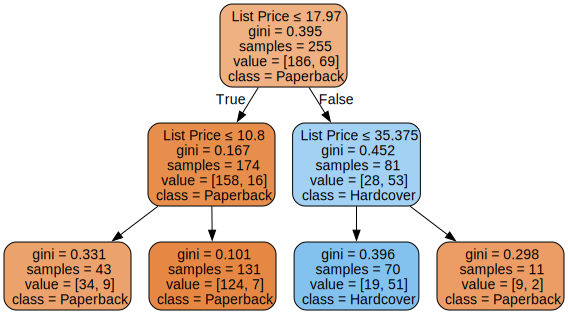

In [13]:
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, train_size=0.8, random_state=1)
print(ab_reduced_noNaN_train.size)

y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['List Price']]

clf = tree.DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X, y)

dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=['List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = gv.Source(dot_data)  
graph

Predictions are made by spliting the data into 2 groups 2 times based on `List Price` thresholds, and classifications are made at the end leaf nodes.

# 5.

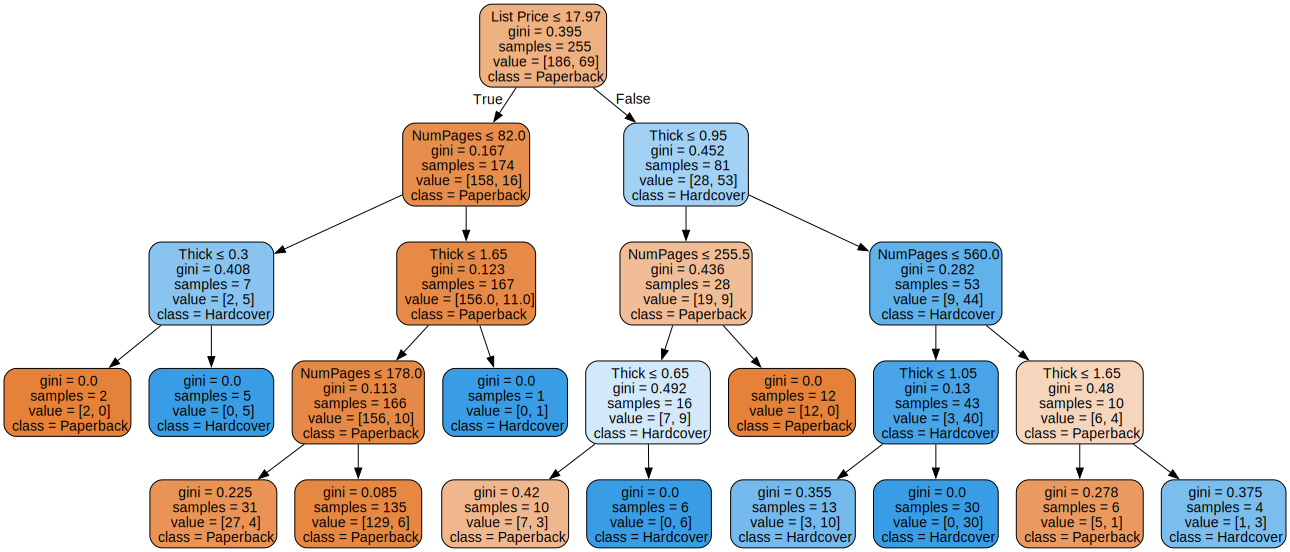

In [15]:
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
clf2 = tree.DecisionTreeClassifier(max_depth=4, random_state=1)
clf2.fit(X, y)

dot_data2 = tree.export_graphviz(
    clf2,
    out_file=None,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph2 = gv.Source(dot_data2)  
graph2

Predictions are made by splitting the data into 2 groups 4 times based on thresholds in `NumPages`, `Thick`, and `List Price`, and classifications are made at the end leafs of the tree.

# 6.

Accuracy: 0.781
Sensitivity: 0.471
Specificity: 0.894


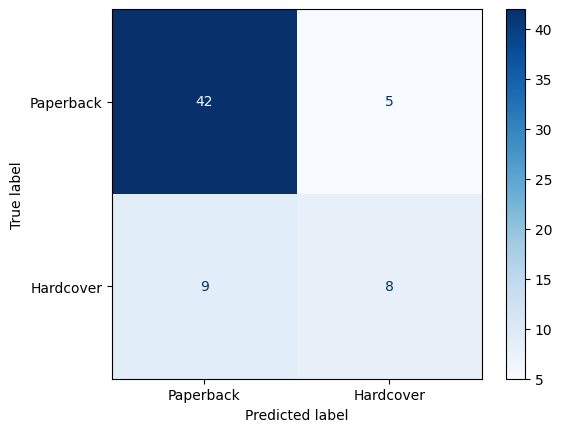

In [25]:
# Prepare the feature (X) and target (y) for testing
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # Target variable: 1 for hardcover, 0 otherwise
X_test = ab_reduced_noNaN_test[['List Price']]  # Feature: List Price

# Create the confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Paperback', 'Hardcover']).plot(cmap='Blues')

# Extract values from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)  # Overall accuracy
sensitivity = TP / (TP + FN)  # True positive rate
specificity = TN / (TN + FP)  # True negative rate

# Print results
print(f"Accuracy: {accuracy:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")


Accuracy: 0.781
Sensitivity: 0.353
Specificity: 0.936


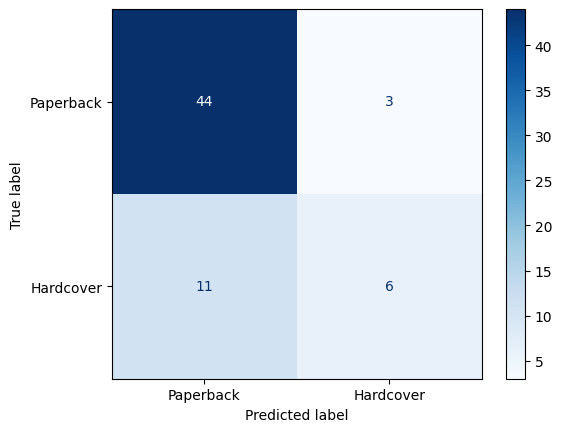

In [26]:
# Prepare the feature (X) and target (y) for testing
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # Target variable: 1 for hardcover, 0 otherwise
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Feature: List Price

# Create the confusion matrix
cm = confusion_matrix(y_test, clf2.predict(X_test))
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Paperback', 'Hardcover']).plot(cmap='Blues')

# Extract values from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)  # Overall accuracy
sensitivity = TP / (TP + FN)  # True positive rate
specificity = TN / (TN + FP)  # True negative rate

# Print results
print(f"Accuracy: {accuracy:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")


# 7.

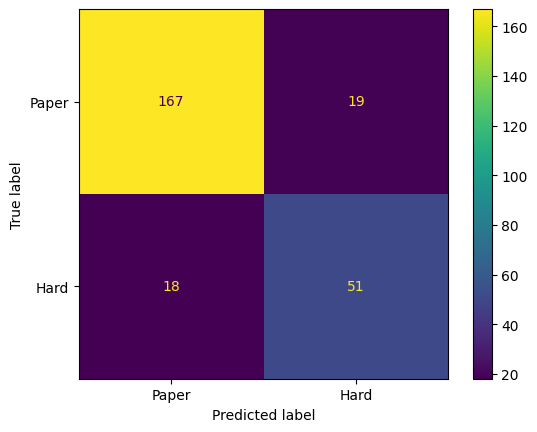

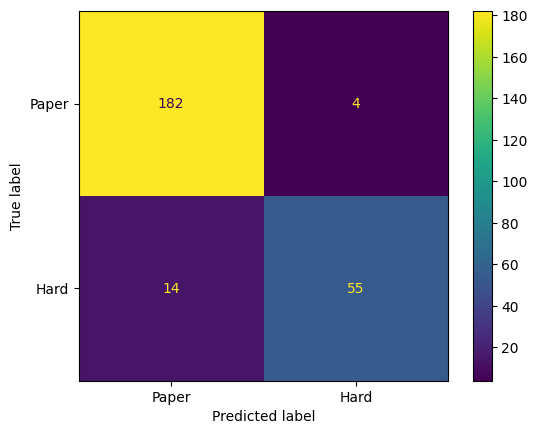

In [29]:
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.Hard_or_Paper == 'H', 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.Hard_or_Paper == 'H', 
                     clf2.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The differece between the 2 matrices are caused by the difference in predictors, the first matrix splits the data twice and can only split on the threshold of one variable, whereas the second metrix splits the data 4 times and can split on the threshold of 3 variables. The 2 confusion matrices above are better because they are built using data that the classification tree has never seen before hence it reflects the tree's generalizability. Compared to these 2 confusion matrices which are tested using the training data, which the tree is expected to perform well on.

# 8.

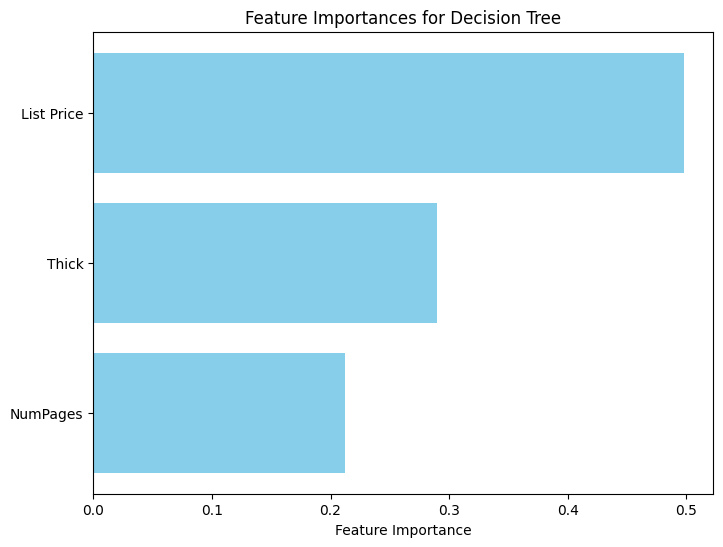

In [32]:
import matplotlib.pyplot as plt

# Get feature importances from the trained classifier
importances = clf2.feature_importances_
feature_names = ['NumPages','Thick','List Price']  # Replace with your feature names

# Sort features by importance (though there's only one in this example)
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(range(len(importances)), importances[indices], align='center', color='skyblue')
plt.yticks(range(len(importances)), np.array(feature_names)[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Decision Tree')
plt.show()


# 9
For linear regression, the significance of the predictor can be determined by looking at the coefficient, the larger it is, the more impactful it is on the outcome variable (higher change in outcome per unit change in predictor). For decision trees, at each step the data is partitioned into 2 pieces and ultimately we want all datapoints in every partition belongs to the same class, hence the feature importance measures how much impurities can be reduced if the data is partitioned by a threshold in the predictor.

### ChatBot Summary
Here’s a concise summary of our exchanges:

Data Preparation and Feature Selection:

Loaded a dataset (amazonbooks.csv) and preprocessed it by dropping missing values and unnecessary columns.
Prepared features (List Price) and target (Hard_or_Paper) for classification using one-hot encoding.
Model Training:

Trained a DecisionTreeClassifier with max_depth=2 to predict whether a book is hardcover or paperback based on List Price.
Visualized the decision tree using tree.plot_tree and Graphviz for clearer interpretability.
Model Evaluation:

Evaluated the classifier on a test set using confusion matrix metrics: accuracy, sensitivity, and specificity.
Used the confusion matrix to compute True Positives, True Negatives, False Positives, and False Negatives, deriving metrics such as:
Accuracy: Overall correctness.
Sensitivity: Ability to identify hardcovers correctly.
Specificity: Ability to identify paperbacks correctly.
Feature Importance:

Demonstrated how to visualize feature importances using a bar plot and explained their role in understanding variable influence in decision trees.
Comparison of Interpretability:

Compared how predictor variables influence predictions in linear regression (via coefficients) versus decision trees (via feature importances), highlighting the global, linear nature of regression versus the local, nonlinear nature of decision trees.

Link: https://chatgpt.com/share/673bfe74-aa9c-8011-a7bd-972d96c4f870

# 10.
I interacted with a Chatbot.